# Part 1: 知识点梳理

### 1. 什么是 Cellular Automaton (CA)？

- CA 是一个 **离散动力系统**：
  - **空间**：由许多 cell 组成（在 1D 就是一条线）。
  - **时间**：每个时刻同步更新。
  - **规则**：一个 cell 的新状态由 **自身 + 邻居** 的状态决定。

------

### 2. Elementary Cellular Automata (ECA)

- **特点**：
  - 1D 线性格子（无限或有限）。
  - 每个 cell 有 **2 种状态**（0 或 1）。
  - 规则只依赖于 **自己和左右两个邻居**（共 3 个 cell）。
- 因此一共有 $2^{2^3} = 256$ 种规则（称为 **Wolfram 规则**）。

------

### 3. Wolfram 规则表示法

- 例如：**Rule 30**，就是把所有 8 种邻居组合的输出编码成一个二进制数，然后转十进制。
  - 邻居模式：111, 110, 101, 100, 011, 010, 001, 000
  - 输出值（二进制）：00011110
  - 转换为十进制 = 30

------

### 4. Wolfram 分类

- **Class 1**：演化到固定状态（例：Rule 0, 32）。
- **Class 2**：演化到周期状态（例：Rule 4, 108）。
- **Class 3**：混沌、无规则（例：Rule 30）。
- **Class 4**：复杂、涌现计算性（例：Rule 110，可图灵完备）。

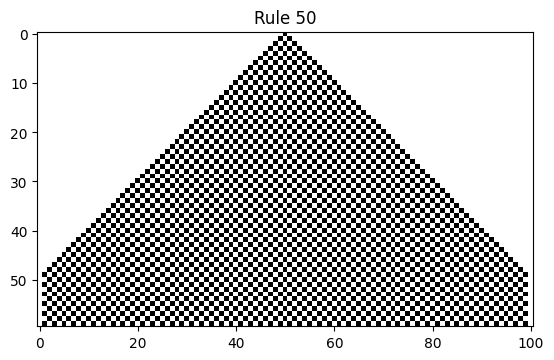

In [2]:
# ECA仿真器（简化）
import numpy as np
import matplotlib.pyplot as plt

def rule_to_dict(rule_number):
    """将Wolfram规则转换为字典映射"""
    # 8钟邻居模式
    patterns = [tuple(map(int, f"{i:03b}")) for i in range(8)]
    # rule_number转换为8位的二进制数字
    outputs = [int(x) for x in f"{rule_number:08b}"]
    outputs.reverse() # Wolfram编码顺序
    return {p: o for p, o in zip(patterns, outputs)}

def run_eca(rule_number, size=101, steps=60):
    rule = rule_to_dict(rule_number)
    grid = np.zeros((steps, size), dtype=int)
    # 初始条件：中间状态为1
    grid[0, size//2] = 1
    for t in range (1, steps):
        for i in range (1, size-1):
            neighborhood = tuple(grid[t-1, i-1:i+2])
            grid[t, i] = rule[neighborhood]
    return grid

# Example: Rule 30
grid = run_eca(30, size=101, steps=60)
plt.imshow(grid, cmap='binary')
plt.title('Rule 30')
plt.show()